In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

# 1. GOAT

In [2]:
# DATA
hw = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv")

zScore = StandardScaler()

In [3]:
zScore.fit(hw[["height","age"]]) #only standardize variables that are numeric
Z = zScore.transform(hw[["height", "age"]])
hw[["height", "age"]] = Z

# Amazon Books (sklearn)

In [4]:
# Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")

In [5]:
ama.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [6]:
ama.isnull().sum(axis = 0)

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [7]:
ama = ama.dropna() #drop missing values


## Explore

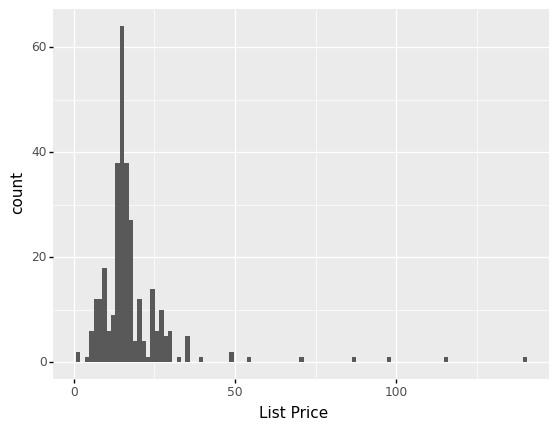

<ggplot: (8776597975595)>

In [8]:
(ggplot(ama, aes("List Price")) + geom_histogram())

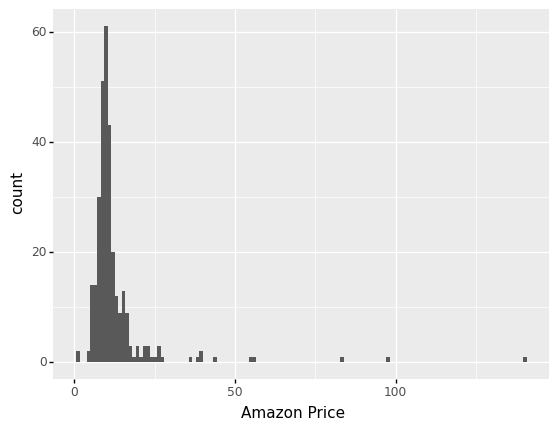

<ggplot: (8776597975589)>

In [9]:
(ggplot(ama, aes("Amazon Price")) + geom_histogram())

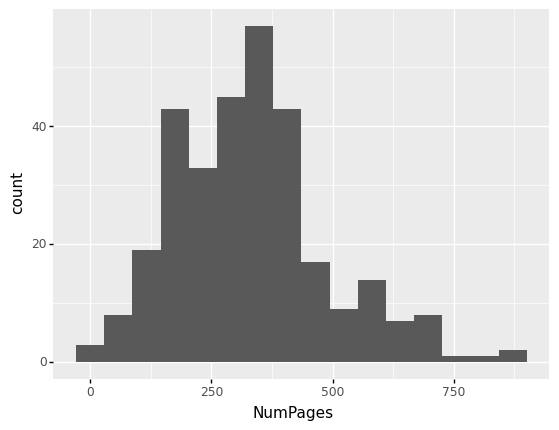

<ggplot: (8776592360554)>

In [10]:
(ggplot(ama, aes("NumPages")) + geom_histogram())

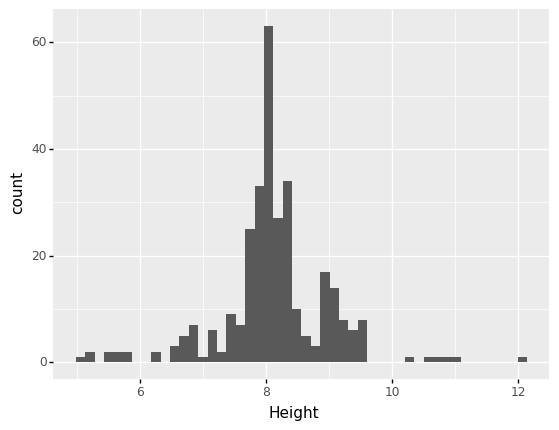

<ggplot: (8776598221442)>

In [11]:
(ggplot(ama, aes("Height")) + geom_histogram())

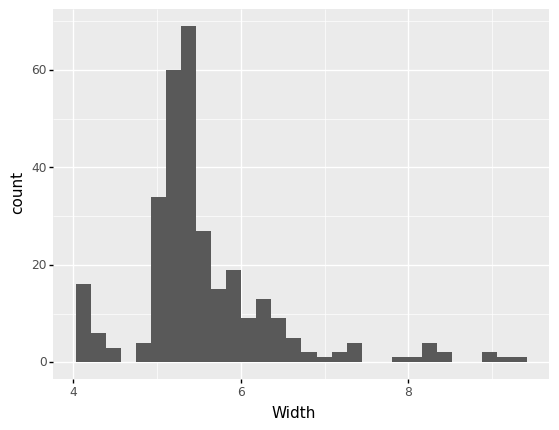

<ggplot: (8776598245060)>

In [12]:
(ggplot(ama, aes("Width")) + geom_histogram())

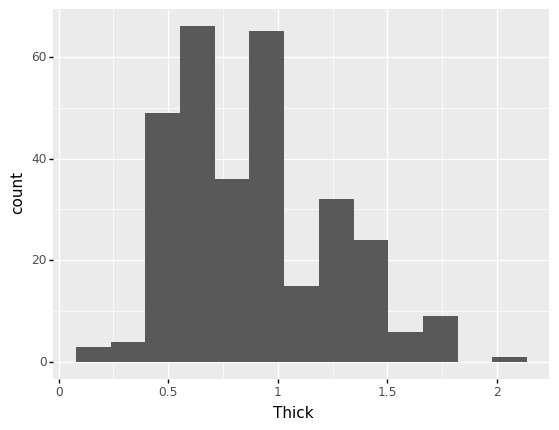

<ggplot: (8776598410716)>

In [13]:
(ggplot(ama, aes("Thick")) + geom_histogram())

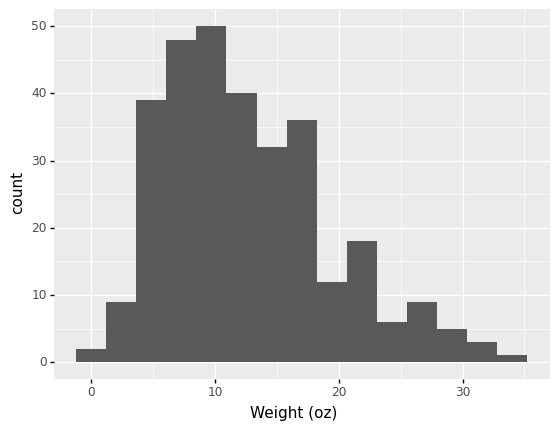

<ggplot: (8776598250286)>

In [14]:
(ggplot(ama, aes("Weight (oz)")) + geom_histogram())

## Model

In [15]:
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]
X = ama[predictors]
Y = ama["Amazon Price"]

In [16]:
zScore = StandardScaler()
zScore.fit(X)
Xz = zScore.transform(X)

In [17]:
LR_Model = LinearRegression()

In [18]:
LR_Model.fit(Xz,Y)

LinearRegression()

### Model Evaluation

In [19]:
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [20]:

(ggplot(predActual))

NameError: name 'predActual' is not defined

In [21]:
mean_squared_error(Y,price_pred)

10.61233860175146

In [ ]:
r2_score(Y,price_pred)

In [21]:
coefficients = pd.DataFrame({"Coef":LR_Model.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [22]:
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


### Predict

In [64]:
newBook = np.array([12.45,300,10,.8,8,5]).reshape(1,-1)
newBookz =zScore.transform(newBook) #standardize
LR_Model.predict(newBookz)

array([6.31575307])

In [66]:
newBook_inter = np.append(newBookz,1) #add intercept
newBook_inter

array([-0.59811786, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [67]:
np.sum(newBook_inter*np.array(coefficients["Coef"]))

6.315753069262777

# Bey (sklearn)

In [71]:
b = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
b.head()

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.386,0.28800,...,balance (mufasa interlude),https://p.scdn.co/mp3-preview/de667c8595dfcf5a...,1,track,spotify:track:1RMvRv1tAvWXgYdH8DUdLX,https://open.spotify.com/track/1RMvRv1tAvWXgYd...,The Lion King: The Gift,C#,major,C# major
1,2,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.484,0.36300,...,BIGGER,https://p.scdn.co/mp3-preview/4a32106cb59a64f2...,2,track,spotify:track:4R2KJOgEUP2qO3re9BwIhs,https://open.spotify.com/track/4R2KJOgEUP2qO3r...,The Lion King: The Gift,F,minor,F minor
2,3,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.537,0.24700,...,the stars (mufasa interlude),https://p.scdn.co/mp3-preview/93479a2826c5e5ab...,3,track,spotify:track:50QREAhIciZoAiRNtyELEh,https://open.spotify.com/track/50QREAhIciZoAiR...,The Lion King: The Gift,D,major,D major
3,4,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.672,0.69600,...,FIND YOUR WAY BACK,https://p.scdn.co/mp3-preview/43718dbb86460b67...,4,track,spotify:track:65kk9CAAqFI3LWBEhUwVqd,https://open.spotify.com/track/65kk9CAAqFI3LWB...,The Lion King: The Gift,E,minor,E minor
4,5,Beyoncé,6vWDO969PvNqNYHIOW5v0m,552zi1M53PQAX5OH4FIdTx,album,2019-07-19,2019,day,0.000,0.00515,...,uncle scar (scar interlude),NaN,5,track,spotify:track:4KJ3NHQvLjA0hB2nv43cxD,https://open.spotify.com/track/4KJ3NHQvLjA0hB2...,The Lion King: The Gift,A,minor,A minor


In [72]:
# Can we predict danceability?
b.columns

Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'disc_number', 'duration_ms', 'explicit',
       'track_href', 'is_local', 'track_name', 'track_preview_url',
       'track_number', 'type', 'track_uri', 'external_urls.spotify',
       'album_name', 'key_name', 'mode_name', 'key_mode'],
      dtype='object')

In [73]:
predictors = ["energy", "key", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

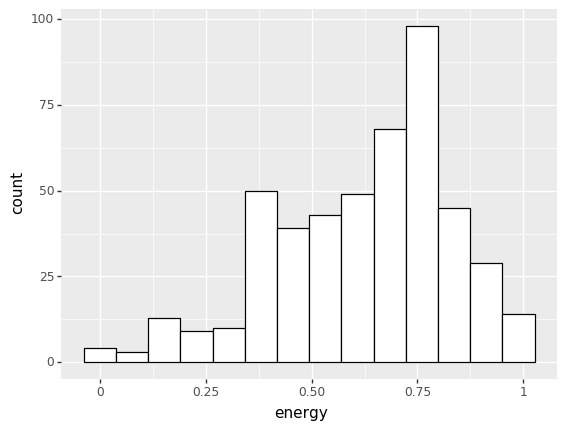

<ggplot: (311613434)>

In [76]:
(ggplot(b, aes("energy")) + geom_histogram(fill = "white", color = "black"))

## Model

In [77]:
X = b[predictors]
Y = b["danceability"]

In [78]:
zScoreb = StandardScaler()
zScoreb.fit(X)

Xz = zScoreb.transform(X) 

In [79]:
BEY_mod = LinearRegression()
BEY_mod.fit(Xz,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
dance_pred = BEY_mod.predict(Xz)

mean_squared_error(Y, dance_pred)

0.012369906348948514

In [82]:
r2_score(Y, dance_pred)

0.6048313370544811

## Prediction

In [83]:
coefficients = pd.DataFrame({"Coef":BEY_mod.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": BEY_mod.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients
#for reference: https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc

,Coef,Name
0,-0.036567,energy
1,-0.004956,key
2,0.028502,loudness
3,0.004691,speechiness
4,-0.067220,acousticness
5,-0.006022,instrumentalness
6,-0.031445,liveness
7,0.094479,valence
8,-0.014397,tempo
9,0.567572,intercept
